# EDA Food Inspection

#### Cargamos la librerias que utilizaremos para generar EDA/GEDA

In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [152]:
#estas lineas son para autocargar 
#la libreria de utils_eda.py 
#si se genera una modificacion en el codigo
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [153]:
import sys
sys.path.append('../')

In [154]:
from utils_notebook.utils_eda import *

In [5]:
path_file = '../data/Food_Inspections.csv'

In [6]:
df_food = pd.read_csv(path_file)

In [7]:
df_food.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2472391,PHILZ COFFEE,PHILZ COFFEE,2766979.0,NaN,Risk 2 (Medium),1555 N WELLS ST,CHICAGO,IL,60610.0,01/07/2021,License,Not Ready,NaN,41.910736,-87.634551,"(-87.63455069145124, 41.910736031820235)"
1,2453551,BIAN,BIAN,2744753.0,Restaurant,Risk 1 (High),600 W CHICAGO AVE,CHICAGO,IL,60654.0,10/20/2020,License,Pass,NaN,41.896585,-87.642996,"(-87.64299618172501, 41.896585191199556)"
2,2386633,JIN JU,JIN JU,27137.0,Restaurant,Risk 1 (High),5203 N CLARK ST,CHICAGO,IL,60640.0,08/28/2020,Canvass,No Entry,NaN,41.976301,-87.668276,"(-87.66827593789948, 41.97630115368914)"
3,2386595,LA BIZNAGA #2,LA BIZNAGA #2,2708992.0,NaN,Risk 1 (High),2949 W BELMONT AVE,CHICAGO,IL,60618.0,08/27/2020,Complaint,No Entry,NaN,41.939256,-87.702270,"(-87.70226967930802, 41.939255926667535)"
4,2386523,MC DONALD'S,MC DONALD'S,2560785.0,Restaurant,Risk 2 (Medium),6336 S ASHLAND AVE,CHICAGO,IL,60636.0,08/26/2020,Short Form Complaint,Pass,NaN,41.778361,-87.664337,"(-87.66433686342792, 41.77836097603761)"


### Generamos análisis primario para observar cómo se comporta la data Raw

In [8]:
count_data(df_food)

,tipo_dato,cantidad,nulos,unicos,moda,top1,f1,top2,f2,top3,f3
columnas,,,,,,,,,,,
Inspection ID,int64,215130,0,215130,valores unicos,2099201,1,1154712,1,2456387,1
DBA Name,object,215130,0,28753,SUBWAY,SUBWAY,2908,DUNKIN DONUTS,1578,MCDONALD'S,614
AKA Name,object,212643,2487,27360,SUBWAY,SUBWAY,3568,DUNKIN DONUTS,1586,7-ELEVEN,882
License #,float64,215113,17,39111,0.000000,0.000000,545,1354323.000000,198,14616.000000,176
Facility Type,object,210238,4892,500,Restaurant,Restaurant,143249,Grocery Store,28093,School,13206
Risk,object,215061,69,4,Risk 1 (High),Risk 1 (High),153869,Risk 2 (Medium),41978,Risk 3 (Low),19185
Address,object,215130,0,18525,11601 W TOUHY AVE,11601 W TOUHY AVE,2674,5700 S CICERO AVE,593,500 W MADISON ST,465
City,object,214972,158,70,CHICAGO,CHICAGO,214227,Chicago,347,chicago,111
State,object,215080,50,4,IL,IL,215077,NY,1,IN,1


None

 *********** Informacion global *************


analisis,columnas,datos,total_nulos,%_nulos,num_var,date_var,cat_var,str_var
informacion,17,215130,67303,31.28%,5,0,0,12


None


#### Haremos algunas trasformaciones a la estructura de los datos antes de generar el Data Profiling como cambiar los tipos de variables a sus correctos.

Como podemos observar en la tabla de arriba los nombres de las columnas contienen espacios en blanco y estan capitalizados aplicamos una normalización para hacer mas eficiente el trabajar mas tarde.

In [9]:
df_food = clean_column(df_food)

In [10]:
df_food.columns

Index(['inspection_id', 'dba_name', 'aka_name', 'license_#', 'facility_type',
       'risk', 'address', 'city', 'state', 'zip', 'inspection_date',
       'inspection_type', 'results', 'violations', 'latitude', 'longitude',
       'location'],
      dtype='object')

##### Ahora verificamos los tipos de datos y si estan correctos.

In [11]:
df_food.dtypes

inspection_id        int64
dba_name            object
aka_name            object
license_#          float64
facility_type       object
risk                object
address             object
city                object
state               object
zip                float64
inspection_date     object
inspection_type     object
results             object
violations          object
latitude           float64
longitude          float64
location            object
dtype: object

-

Observamos que las columnas **inspection_date** es del tipo String en formato **mm/dd/aaaa** y que no tienen valores nulos antes de hacer la conversión a tipo Date hacemos una comprobación de que todos los registros cumplan con este formato.

In [12]:
listFecha = ["inspection_date"]
date_format = "mm/dd/aaaa"

In [13]:
checkDateForm(df_food, listFecha, date_format)

mm/dd/aaaa

Cantidad de valores en inspection_date que no cumplen con el formato mm/dd/aaaa : 0
Distribucion de valores:
 Series([], Name: 0, dtype: int64)


-

Todas cumplen con ese formato ahora cambiaremos el tipo a **datetime** para su correcto manejo.

In [14]:
type_format = '%m/%d/%Y'

In [15]:
changeType_date(df_food,listFecha, type_format)

Comprobamos que los cambios 

In [16]:
df_food.dtypes

inspection_id               int64
dba_name                   object
aka_name                   object
license_#                 float64
facility_type              object
risk                       object
address                    object
city                       object
state                      object
zip                       float64
inspection_date    datetime64[ns]
inspection_type            object
results                    object
violations                 object
latitude                  float64
longitude                 float64
location                   object
dtype: object

In [17]:
df_food.inspection_date.head()

0   2021-01-07
1   2020-10-20
2   2020-08-28
3   2020-08-27
4   2020-08-26
Name: inspection_date, dtype: datetime64[ns]

# Data Profiling 

In [18]:
df_food.dtypes

inspection_id               int64
dba_name                   object
aka_name                   object
license_#                 float64
facility_type              object
risk                       object
address                    object
city                       object
state                      object
zip                       float64
inspection_date    datetime64[ns]
inspection_type            object
results                    object
violations                 object
latitude                  float64
longitude                 float64
location                   object
dtype: object

-

Obtenemos las variables con las que trabajaremos el Data profiling.

In [19]:
dicVar = getVariables(df_food)

In [20]:
dicVar

{'num_var': (5,
  array(['inspection_id', 'license_#', 'zip', 'latitude', 'longitude'],
        dtype=object)),
 'date_var': (1, array(['inspection_date'], dtype=object)),
 'cat_var': (0, array([], dtype=object)),
 'str_var': (11,
  array(['dba_name', 'aka_name', 'facility_type', 'risk', 'address', 'city',
         'state', 'inspection_type', 'results', 'violations', 'location'],
        dtype=object))}

-


Para crear una homologación de los valores en las columnas con tipo de variable String pasaremos todo a **minusculas** y remplasaremos espacios en blanco con **"_"**.

In [21]:
convert_lower(df_food, dicVar['str_var'][1])

In [22]:
df_food.head()

,inspection_id,dba_name,aka_name,license_#,facility_type,risk,address,city,state,zip,inspection_date,inspection_type,results,violations,latitude,longitude,location
0,2472391,philz coffee,philz coffee,2766979.0,NaN,risk 2 (medium),1555 n wells st,chicago,il,60610.0,2021-01-07,license,not ready,NaN,41.910736,-87.634551,"(-87.63455069145124, 41.910736031820235)"
1,2453551,bian,bian,2744753.0,restaurant,risk 1 (high),600 w chicago ave,chicago,il,60654.0,2020-10-20,license,pass,NaN,41.896585,-87.642996,"(-87.64299618172501, 41.896585191199556)"
2,2386633,jin ju,jin ju,27137.0,restaurant,risk 1 (high),5203 n clark st,chicago,il,60640.0,2020-08-28,canvass,no entry,NaN,41.976301,-87.668276,"(-87.66827593789948, 41.97630115368914)"
3,2386595,la biznaga #2,la biznaga #2,2708992.0,NaN,risk 1 (high),2949 w belmont ave,chicago,il,60618.0,2020-08-27,complaint,no entry,NaN,41.939256,-87.702270,"(-87.70226967930802, 41.939255926667535)"
4,2386523,mc donald's,mc donald's,2560785.0,restaurant,risk 2 (medium),6336 s ashland ave,chicago,il,60636.0,2020-08-26,short form complaint,pass,NaN,41.778361,-87.664337,"(-87.66433686342792, 41.77836097603761)"


-

Procedemos al Data Profiling 

### Variables Categoricas

In [23]:
data_profiling_categ(df_food,dicVar['str_var'][1])

metrica,dba_name,aka_name,facility_type,risk,address,city,state,inspection_type,results,violations,location
registros,215130,215130,215130,215130,215130,215130,215130,215130,215130,215130,215130
nulos,0,2487,4892,69,0,158,50,1,0,57447,710
Num_categorias,28459,27074,449,4,18376,65,4,98,7,156702,17248
categorias,"[philz coffee, bian, jin ju, la biznaga #2, mc...","[philz coffee, bian, jin ju, la biznaga #2, mc...","[nan, restaurant, general store, children's se...","[risk 2 (medium), risk 1 (high), risk 3 (low),...","[1555 n wells st , 600 w chicago ave , 5203 n ...","[chicago, schaumburg, elmhurst, chicago., wilm...","[il, nan, ny, in, wi]","[license, canvass, complaint, short form compl...","[not ready, pass, no entry, out of business, f...","[nan, 3. management, food employee and conditi...","[(-87.63455069145124, 41.910736031820235), (-8..."
moda,subway,subway,restaurant,risk 1 (high),11601 w touhy ave,chicago,il,canvass,pass,2. facilities to maintain proper temperature -...,"(-87.91442843927047, 42.008536400868735)"
top1,subway,subway,restaurant,risk 1 (high),11601 w touhy ave,chicago,il,canvass,pass,2. facilities to maintain proper temperature -...,"(-87.91442843927047, 42.008536400868735)"
f1,3092,3806,143249,153869,2679,214699,215077,114251,112641,12,2691
top2,dunkin donuts,dunkin donuts,grocery store,risk 2 (medium),5700 s cicero ave,cchicago,in,license,fail,32. food and non-food contact surfaces properl...,"(-87.74164564419637, 41.789329323265385)"
f2,1648,1652,28097,41978,593,48,1,28304,41527,11,593
top3,mcdonald's,mcdonald's,school,risk 3 (low),500 w madison st,schaumburg,wi,canvass re-inspection,pass w/ conditions,45. food handler requirements met - comments: ...,"(-87.64111966683218, 41.884187507127805)"


In [24]:
df_food.city.value_counts()

chicago               214699
cchicago                  48
schaumburg                27
maywood                   16
elk grove village         13
                       ...  
wadsworth                  1
lake bluff                 1
lombard                    1
country club hills         1
justice                    1
Name: city, Length: 65, dtype: int64

In [25]:
df_food[df_food["city"]=="chicago."]

,inspection_id,dba_name,aka_name,license_#,facility_type,risk,address,city,state,zip,inspection_date,inspection_type,results,violations,latitude,longitude,location
486,2291075,"healthy substance kitchen, llc",healthy substance kitchen,2616016.0,restaurant,risk 1 (high),6852 w archer ave,chicago.,il,60638.0,2019-06-06,canvass,pass,41. wiping cloths: properly used & stored - co...,41.792225,-87.793707,"(-87.79370678068234, 41.79222523641447)"
47384,2185055,"healthy substance kitchen, llc",healthy substance kitchen,2616016.0,restaurant,risk 1 (high),6852 w archer ave,chicago.,il,60638.0,2018-07-25,license,pass w/ conditions,"3. management, food employee and conditional e...",41.792225,-87.793707,"(-87.79370678068234, 41.79222523641447)"


In [26]:
df_food.state.value_counts()

il    215077
in         1
wi         1
ny         1
Name: state, dtype: int64

### Variables Numericas

In [27]:
data_profiling_num(df_food,dicVar['num_var'][1])

metricas,inspection_id,license_#,zip,latitude,longitude
registros,215130,215113,215078,214420,214420
nulos,0,17,52,710,710
unicos,215130,39111,112,17248,17248
moda,valores unicos,0.000000,60614.000000,42.008536,-87.914428
min,44247.000000,0.000000,10014.000000,41.644670,-87.914428
max,2472776.000000,9999999.000000,60827.000000,42.021064,-87.525094
mean,1528869.843169,1630342.368829,60628.759227,41.880910,-87.676426
stdv,661474.231078,902765.321212,116.778081,0.081026,0.058527
25%,1188711.250000,1247748.000000,60614.000000,41.832580,-87.707338
median,1528174.500000,1992224.000000,60625.000000,41.891893,-87.666420


### Variables de Fechas

In [28]:
data_profiling_date(df_food,dicVar['date_var'][1])

metricas,inspection_date
tipo dato,<class 'numpy.datetime64'>
registros,215130
nulos,0
unicos,2797
moda,0 2013-11-14 dtype: datetime64[ns]
fecha inicio,2010-01-04 00:00:00
fecha fin,2021-01-15 00:00:00
top1,2013-11-14 00:00:00
f1,185
top2,2016-09-13 00:00:00


In [29]:
#para generar el requirements.txt
##pip freeze > requirements.txt

In [30]:
df_food.inspection_date.value_counts()

2013-11-14    185
2016-09-13    149
2016-11-29    145
2014-12-16    143
2013-10-01    142
             ... 
2012-08-11      1
2018-09-29      1
2010-04-04      1
2011-02-11      1
2012-03-10      1
Name: inspection_date, Length: 2797, dtype: int64

In [31]:
df_food.city.value_counts()

chicago               214699
cchicago                  48
schaumburg                27
maywood                   16
elk grove village         13
                       ...  
wadsworth                  1
lake bluff                 1
lombard                    1
country club hills         1
justice                    1
Name: city, Length: 65, dtype: int64

In [36]:
df_food.facility_type.value_counts()[0:10]

restaurant                         143249
grocery store                       28097
school                              13219
children's services facility         3711
bakery                               3153
daycare (2 - 6 years)                2838
daycare above and under 2 years      2665
long term care                       1430
catering                             1314
liquor                                937
Name: facility_type, dtype: int64

In [60]:
facility_topten = df_food[df_food.facility_type.isin(df_food.facility_type.value_counts().index[0:10])]

In [61]:
facility_topten.head()

,inspection_id,dba_name,aka_name,license_#,facility_type,risk,address,city,state,zip,inspection_date,inspection_type,results,violations,latitude,longitude,location
1,2453551,bian,bian,2744753.0,restaurant,risk 1 (high),600 w chicago ave,chicago,il,60654.0,2020-10-20,license,pass,NaN,41.896585,-87.642996,"(-87.64299618172501, 41.896585191199556)"
2,2386633,jin ju,jin ju,27137.0,restaurant,risk 1 (high),5203 n clark st,chicago,il,60640.0,2020-08-28,canvass,no entry,NaN,41.976301,-87.668276,"(-87.66827593789948, 41.97630115368914)"
4,2386523,mc donald's,mc donald's,2560785.0,restaurant,risk 2 (medium),6336 s ashland ave,chicago,il,60636.0,2020-08-26,short form complaint,pass,NaN,41.778361,-87.664337,"(-87.66433686342792, 41.77836097603761)"
5,2386464,uni sushi bristo,uni sushi bistro,2262637.0,restaurant,risk 1 (high),1752 w north ave,chicago,il,60622.0,2020-08-25,complaint,no entry,NaN,41.910676,-87.672205,"(-87.67220465807979, 41.91067561170382)"
6,2386401,hq beercade ii,hq beercade,1494999.0,restaurant,risk 1 (high),213 w institute pl,chicago,il,60610.0,2020-08-24,canvass,not ready,NaN,41.897304,-87.634804,"(-87.63480416772768, 41.8973037387733)"


In [137]:
df_t = facility_topten.groupby(['facility_type','results'],as_index=False)['inspection_id'].count()\
.rename(columns={"inspection_id": 'n'}).sort_values('n', ascending = False)

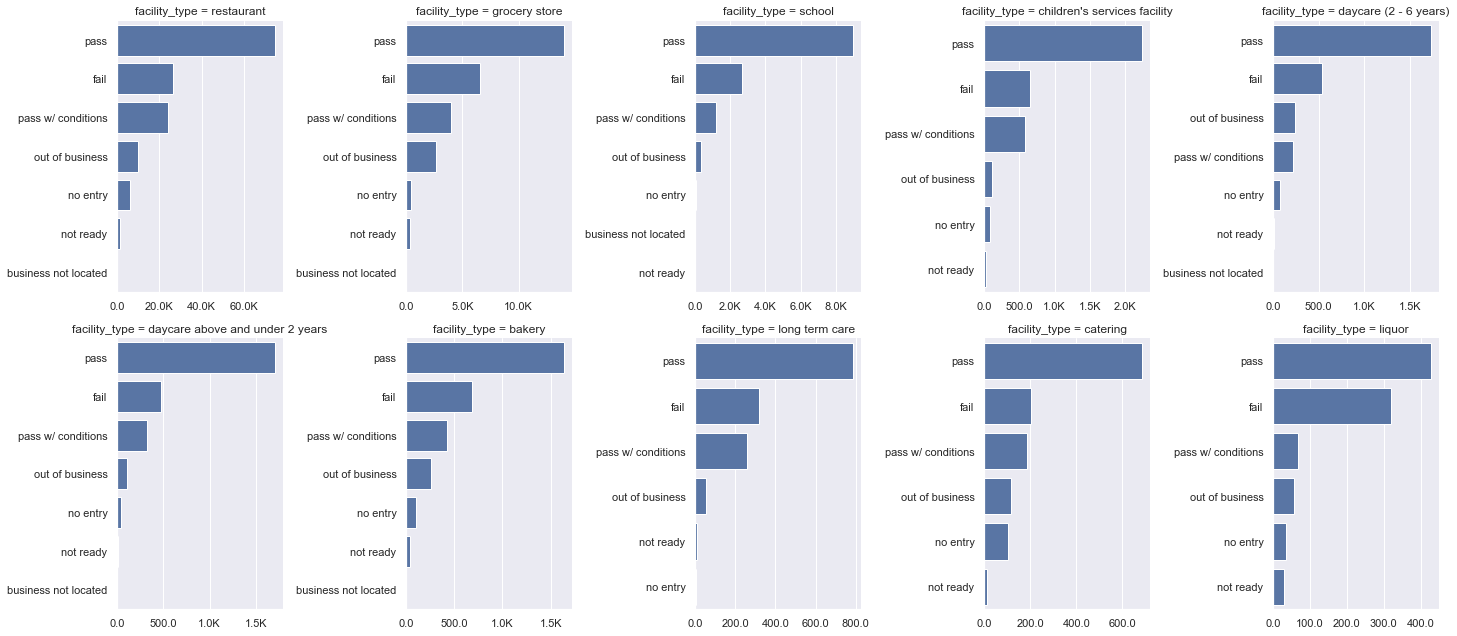

In [155]:
a = sns.FacetGrid(data=df_t, col="facility_type", col_wrap=5, sharex=False, sharey=False,
                 height=4.5, aspect=0.9)
a.map_dataframe(sns.barplot, x="n", y="results")

for ax in a.axes.flat:
    ax.xaxis.set_major_formatter(FuncFormatter(number_formatter))
